In [119]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

from sklearn.preprocessing import StandardScaler
import scipy.cluster.hierarchy as shc

from sklearn.cluster import KMeans, DBSCAN
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA

In [53]:
df = pd.read_csv("customer_data.csv", encoding="latin1")

In [54]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [55]:
df.shape

(541909, 8)

In [56]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [57]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  str    
 1   StockCode    541909 non-null  str    
 2   Description  540455 non-null  str    
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  str    
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  str    
dtypes: float64(2), int64(1), str(5)
memory usage: 33.1 MB


In [58]:
df.duplicated().sum()

np.int64(5268)

In [59]:
df.drop_duplicates(inplace=True)

In [60]:
df.dropna(subset=['CustomerID'],inplace=True)

In [61]:
df.duplicated().sum()

np.int64(0)

In [62]:
df.shape

(401604, 8)

In [63]:
df = df[df['Quantity'] > 0]
df = df[df['UnitPrice'] > 0]

In [64]:
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [65]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Quantity,392692.0,13.119702,180.492832,1.000,2.00,6.00,12.00,80995.00
UnitPrice,392692.0,3.125914,22.241836,0.001,1.25,1.95,3.75,8142.75
CustomerID,392692.0,15287.843865,1713.539549,12346.000,13955.00,15150.00,16791.00,18287.00


In [66]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [67]:
df['TotalPurchase'] = df['Quantity'] * df['UnitPrice']

In [68]:
df.to_csv("cleaned_data.csv", index=False)

In [69]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPurchase
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60


In [70]:
df.dtypes

InvoiceNo                   str
StockCode                   str
Description                 str
Quantity                  int64
InvoiceDate      datetime64[us]
UnitPrice               float64
CustomerID              float64
Country                     str
TotalPurchase           float64
dtype: object

In [71]:
snapshot_date = df['InvoiceDate'].max()

In [72]:
rfm = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (snapshot_date - x.max()).days,
    'InvoiceNo': 'count',
    'TotalPurchase': 'sum'
})

In [73]:
rfm.columns = ['Recency', 'Frequency', 'Monetary']
rfm.head()

,Recency,Frequency,Monetary
CustomerID,,,
12346.0,325,1,77183.60
12347.0,1,182,4310.00
12348.0,74,31,1797.24
12349.0,18,73,1757.55
12350.0,309,17,334.40


In [74]:
df.dtypes

InvoiceNo                   str
StockCode                   str
Description                 str
Quantity                  int64
InvoiceDate      datetime64[us]
UnitPrice               float64
CustomerID              float64
Country                     str
TotalPurchase           float64
dtype: object

## Visualization

In [123]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'TotalPurchase'],
      dtype='str')

In [124]:
df[['TotalPurchase','Country']]

,TotalPurchase,Country
0,15.30,United Kingdom
1,20.34,United Kingdom
2,22.00,United Kingdom
3,20.34,United Kingdom
4,20.34,United Kingdom
...,...,...
541904,10.20,France
541905,12.60,France
541906,16.60,France
541907,16.60,France


## Clustering

### Plot Clustering Function

In [75]:
def plot_cluster(x, labels, title="Scatterplot of Clusters", xlabel="X", ylabel="Y", figsize=(8,6)):
    unique_labels = np.unique(labels)

    plt.figure(figsize=figsize)

    for label in unique_labels:
        if label == -1:
            plt.scatter(
                x[labels == label, 0],
                x[labels == label, 1],
                c="black",
                s=40,
                label="Outliers",
                alpha=0.7
            )
        else:
            plt.scatter(
                x[labels == label, 0],
                x[labels == label, 1],
                s=40,
                label=f"Cluster {label + 1}",
                alpha=0.7
            )

    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.tight_layout()
    plt.legend()
    plt.show()

In [120]:
import numpy as np
import plotly.graph_objects as go

def plot_clusters_3d(X, labels, title="3D Cluster Visualization"):
    """
    X      : 3D data (n_samples, 3)
    labels : clustering labels (-1 for outliers)
    """

    fig = go.Figure()
    unique_labels = np.unique(labels)

    for label in unique_labels:
        if label == -1:
            fig.add_trace(
                go.Scatter3d(
                    x=X[labels == label, 0],
                    y=X[labels == label, 1],
                    z=X[labels == label, 2],
                    mode="markers",
                    marker=dict(size=5, color="black"),
                    name="Outliers"
                )
            )
        else:
            fig.add_trace(
                go.Scatter3d(
                    x=X[labels == label, 0],
                    y=X[labels == label, 1],
                    z=X[labels == label, 2],
                    mode="markers",
                    marker=dict(size=5),
                    name=f"Cluster {label + 1}"
                )
            )

    fig.update_layout(
        title=title,
        scene=dict(
            xaxis_title="Feature 1",
            yaxis_title="Feature 2",
            zaxis_title="Feature 3",
        ),
        legend_title="Clusters",
        height=600
    )

    fig.show()

### Clustering

In [76]:
rfm

,Recency,Frequency,Monetary
CustomerID,,,
12346.0,325,1,77183.60
12347.0,1,182,4310.00
12348.0,74,31,1797.24
12349.0,18,73,1757.55
12350.0,309,17,334.40
...,...,...,...
18280.0,277,10,180.60
18281.0,180,7,80.82
18282.0,7,12,178.05


In [77]:
x = rfm[['Recency','Frequency','Monetary']]

In [78]:
x_scale = StandardScaler().fit_transform(x)

In [79]:
wcss = []

for k in range(1,11):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(x_scale)
    wcss.append(km.inertia_)

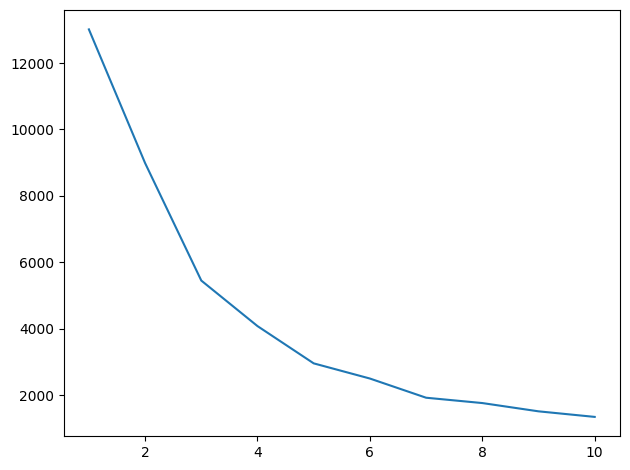

In [80]:
plt.plot(range(1,11),wcss)
plt.tight_layout()
plt.show()

In [ ]:
km = KMeans(n_clusters=5, random_state=42)
km_labels = km.fit_predict(x_scale)

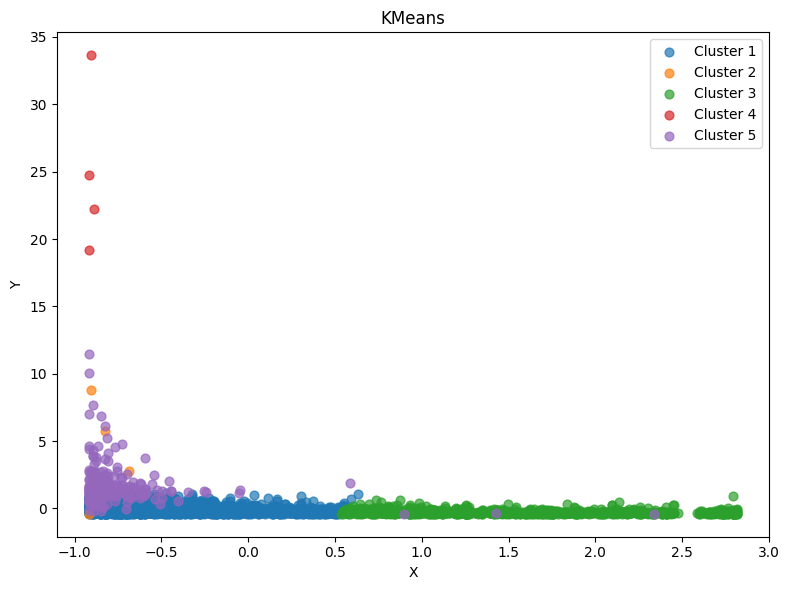

In [82]:
plot_cluster(
    x_scale,
    labels = km_labels,
    title = "KMeans",
)

In [121]:
plot_clusters_3d(x_scale, labels = km_labels, title = "3D KMeans")

In [122]:
rfm['Cluster'] = km_labels
rfm.groupby('Cluster').mean()

,Recency,Frequency,Monetary
Cluster,,,
0,43.353175,72.061177,1328.738576
1,6.666667,825.833333,190808.536667
2,248.476777,27.405687,488.761897
3,1.000000,5717.250000,70612.247500
4,15.253012,474.064257,11751.644297
